# Project

In this Project, you will bring together many of the tools and techniques that you have learned throughout this course into a final project. You can choose from many different paths to get to the solution. 

### Business scenario

You work for a training organization that recently developed an introductory course about machine learning (ML). The course includes more than 40 videos that cover a broad range of ML topics. You have been asked to create an application that will students can use to quickly locate and view video content by searching for topics and key phrases.

You have downloaded all of the videos to an Amazon Simple Storage Service (Amazon S3) bucket. Your assignment is to produce a dashboard that meets your supervisor’s requirements.

## Project steps<a id="Capstone-8:-Bringing-It-All-Together"></a>

To complete this project, you will follow these steps:

1. [Viewing the video files](#1.-Viewing-the-video-files)
2. [Transcribing the videos](#2.-Transcribing-the-videos)
3. [Normalizing the text](#3.-Normalizing-the-text)
4. [Extracting key phrases and topics](#4.-Extracting-key-phrases-and-topics)
5. [Creating the dashboard](#5.-Creating-the-dashboard)
6. [Output](#6.-Output)

## Useful information

The following cell contains some information that might be useful as you complete this project.

In [1]:
bucket = "c56161a939430l3396553t1w744137092661-labbucket-rn642jaq01e9"
job_data_access_role = 'arn:aws:iam::744137092661:role/service-role/c56161a939430l3396553t1w7-ComprehendDataAccessRole-1P24MSS91ADHP'

## 1. Viewing the video files<a id="1.-Viewing-the-video-files"></a>
([Go to top](#Capstone-8:-Bringing-It-All-Together))


The source video files are located in the following shared Amazon Simple Storage Service (Amazon S3) bucket.

In [2]:
!aws s3 ls s3://aws-tc-largeobjects/CUR-TF-200-ACMNLP-1/video/

In [3]:
import os
import pandas as pd

# specify the directory path where the video files are located
path = "/Users/riddhi/NLP Project/videos/"

# get all the files in the specified directory
files = os.listdir(path)

# create an empty DataFrame to store the video file names and paths
df = pd.DataFrame(columns=["filename", "path"])

# loop through each file in the directory
for file in files:
    # check if the file is a video file
    if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
        # create a dictionary with the file name and path
        data = {"filename": os.path.splitext(file)[0], "path": os.path.join(path, file)}
        # append the dictionary to the DataFrame
        df = df.append(data, ignore_index=True)

/var/folders/fr/rvb8bg493lz7w0zbbm7mlppm0000gn/T/ipykernel_9327/733161753.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/fr/rvb8bg493lz7w0zbbm7mlppm0000gn/T/ipykernel_9327/733161753.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/fr/rvb8bg493lz7w0zbbm7mlppm0000gn/T/ipykernel_9327/733161753.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/fr/rvb8bg493lz7w0zbbm7mlppm0000gn/T/ipykernel_9327/733161753.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d

In [4]:
# display the video file names and paths in the DataFrame
df

filename                                               path
0         Mod04_Sect01  /Users/riddhi/NLP Project/videos/Mod04_Sect01.mp4
1         Mod02_WrapUp  /Users/riddhi/NLP Project/videos/Mod02_WrapUp.mp4
2   Mod03_Sect04_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect04_...
3         Mod06_Sect01  /Users/riddhi/NLP Project/videos/Mod06_Sect01.mp4
4         Mod06_Sect02  /Users/riddhi/NLP Project/videos/Mod06_Sect02.mp4
5   Mod03_Sect03_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect03_...
6         Mod06_WrapUp  /Users/riddhi/NLP Project/videos/Mod06_WrapUp.mp4
7          Mod05_Intro   /Users/riddhi/NLP Project/videos/Mod05_Intro.mp4
8          Mod03_Intro   /Users/riddhi/NLP Project/videos/Mod03_Intro.mp4
9         Mod03_WrapUp  /Users/riddhi/NLP Project/videos/Mod03_WrapUp.mp4
10        Mod03_Sect08  /Users/riddhi/NLP Project/videos/Mod03_Sect08.mp4
11  Mod05_Sect03_part1  /Users/riddhi/NLP Project/videos/Mod05_Sect03_...
12        Mod04_WrapUp  /Users/riddhi/NLP Project/videos/Mod04_WrapUp.mp4
13         Mod04_Intro   /Users/riddhi/NLP Project/videos/Mod04_Intro.mp4
14  Mod04_Sect02_part1  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...
15  Mod03_Sect07_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect07_...
16   Mod05_WrapUp_ver2  /Users/riddhi/NLP Project/videos/Mod05_WrapUp_...
17  Mod04_Sect02_part2  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...
18        Mod02_Sect04  /Users/riddhi/NLP Project/videos/Mod02_Sect04.mp4

## 2. Transcribing the videos
 ([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to implement your solution to transcribe the videos. 

In [5]:
# Write your answer/code here
import os
from moviepy.editor import *

# specify the directory path where the video files are located
video_dir = "/Users/riddhi/NLP Project/videos/"

# create a directory to store the audio files
audio_dir = "/Users/riddhi/NLP Project/audios/"
if not os.path.exists(audio_dir):
    os.makedirs(audio_dir)

# loop through each file in the directory
for filename in os.listdir(video_dir):
    # check if the file is a video file
    if filename.endswith(".mp4") or filename.endswith(".avi") or filename.endswith(".mkv"):
        # create the full path to the video file
        video_path = os.path.join(video_dir, filename)
        # create the full path to the audio file
        audio_path = os.path.join(audio_dir, os.path.splitext(filename)[0] + ".mp3")
        # load the video file using moviepy
        video = VideoFileClip(video_path)
        # extract the audio from the video
        audio = video.audio
        # write the audio to a file
        audio.write_audiofile(audio_path)
        # close the video and audio files
        video.close()
        audio.close()

print("Audio conversion complete.")

MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod04_Sect01.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod02_WrapUp.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_Sect04_part2.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod06_Sect01.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod06_Sect02.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_Sect03_part2.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod06_WrapUp.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod05_Intro.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_Intro.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_WrapUp.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_Sect08.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod05_Sect03_part1.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod04_WrapUp.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod04_Intro.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod04_Sect02_part1.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod03_Sect07_part2.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod05_WrapUp_ver2.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod04_Sect02_part2.mp3


MoviePy - Done.
MoviePy - Writing audio in /Users/riddhi/NLP Project/audios/Mod02_Sect04.mp3


MoviePy - Done.
Audio conversion complete.


In [6]:
df

filename                                               path
0         Mod04_Sect01  /Users/riddhi/NLP Project/videos/Mod04_Sect01.mp4
1         Mod02_WrapUp  /Users/riddhi/NLP Project/videos/Mod02_WrapUp.mp4
2   Mod03_Sect04_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect04_...
3         Mod06_Sect01  /Users/riddhi/NLP Project/videos/Mod06_Sect01.mp4
4         Mod06_Sect02  /Users/riddhi/NLP Project/videos/Mod06_Sect02.mp4
5   Mod03_Sect03_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect03_...
6         Mod06_WrapUp  /Users/riddhi/NLP Project/videos/Mod06_WrapUp.mp4
7          Mod05_Intro   /Users/riddhi/NLP Project/videos/Mod05_Intro.mp4
8          Mod03_Intro   /Users/riddhi/NLP Project/videos/Mod03_Intro.mp4
9         Mod03_WrapUp  /Users/riddhi/NLP Project/videos/Mod03_WrapUp.mp4
10        Mod03_Sect08  /Users/riddhi/NLP Project/videos/Mod03_Sect08.mp4
11  Mod05_Sect03_part1  /Users/riddhi/NLP Project/videos/Mod05_Sect03_...
12        Mod04_WrapUp  /Users/riddhi/NLP Project/videos/Mod04_WrapUp.mp4
13         Mod04_Intro   /Users/riddhi/NLP Project/videos/Mod04_Intro.mp4
14  Mod04_Sect02_part1  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...
15  Mod03_Sect07_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect07_...
16   Mod05_WrapUp_ver2  /Users/riddhi/NLP Project/videos/Mod05_WrapUp_...
17  Mod04_Sect02_part2  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...
18        Mod02_Sect04  /Users/riddhi/NLP Project/videos/Mod02_Sect04.mp4

In [7]:
import os
import json
import time
import threading
from pathlib import Path

import concurrent.futures

from os.path import join, dirname
from ibm_watson import SpeechToTextV1
from ibm_watson.websocket import RecognizeCallback, AudioSource
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


directory = Path().absolute()


# 'YOUR UNIQUE API KEY'
authenticator = IAMAuthenticator('LEviD93AiHOHIkOF23hiRlYUqpEQ0cNeyIqjAos_yS1i') 
service = SpeechToTextV1(authenticator = authenticator)
   
#Insert URL in place of 'API_URL' 
service.set_service_url('https://api.au-syd.speech-to-text.watson.cloud.ibm.com/instances/64f701ff-61b5-4ce7-af64-6ee723c74f2a')

def process_audio_file(filename):
    audio_file_path = directory.joinpath(filename)
    print(f"Current file: '{filename}'")
    with open(audio_file_path, "rb") as audio_file:
        data = service.recognize(
            audio=audio_file,
            content_type="audio/mp3",
            model="en-US_NarrowbandModel"
        ).get_result()
    print(f"Speech-to-text complete for: '{filename}'")
    return (data, filename)



def process_data(json_data, filename, df):
    print(f"Processing: {filename}")
    
    cols = ["transcript", "confidence"]
    dfdata = [[t[cols[0]], t[cols[1]]] for r in json_data.get('results') for t in r.get("alternatives")]
#     print("dfdata ::  : : :  :",dfdata)
#     print()
    df0 = pd.DataFrame(data = dfdata, columns = cols)
#     print("df0: : : : :   ",df0)
#     print()
   
    df1 = pd.DataFrame(df0).drop(["confidence"], axis=1)
#     print("df1:  : : : :  ", df1)
#     print()

    #transpose DataFrame to convert rows to columns
    df_transposed = df1.transpose()

    # concatenate all columns into a single column
    combined_series = df_transposed.apply(lambda x: ''.join(x), axis=1)

    # create a new DataFrame with a single row containing the concatenated values
    combined_df = pd.DataFrame({'transcript': combined_series})
#     print("df: : ",combined_df)
#     print()
#     print("filename",filename)
#     print()
    # Find the row in `df` that corresponds to the current file being processed
    if filename in df['filename'].values:
        row = df.loc[(df['filename'] == filename), :].index[0]
        df.loc[row, 'transcribed_text'] = combined_df["transcript"].to_list()
#         print(df)
#         print()
    else:
        print(f"Filename {filename} not found in DataFrame.")
        print()

    
print("Running...")

# Default num. workers == min(32, os.cpu_count() + 4)
n_workers = os.cpu_count() + 2

# Create generator for all .wav files in folder (and subfolders).
file_gen = directory.glob("**/*.mp3")
with concurrent.futures.ThreadPoolExecutor(max_workers = n_workers) as executor:
    futures = {executor.submit(process_audio_file, f) for f in file_gen}
    for future in concurrent.futures.as_completed(futures):
        pkg = future.result()
        print("Processing: ", pkg[1])
#         print()
#         print("pkg[0]", pkg[0])
#         print()
#         print("pkg[1]", pkg[1].stem)
        filename=pkg[1].stem
        process_data(pkg[0], filename, df)
        
print("Transcribed all the videos successfully!!!")


Running...
Current file: '/Users/riddhi/NLP Project/audios/Mod04_Sect01.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod02_WrapUp.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod03_Sect04_part2.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod06_Sect01.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod06_Sect02.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod03_Sect03_part2.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod06_WrapUp.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod05_Intro.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod03_Intro.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod03_WrapUp.mp3'
Speech-to-text complete for: '/Users/riddhi/NLP Project/audios/Mod06_WrapUp.mp3'
Current file: '/Users/riddhi/NLP Project/audios/Mod03_Sect08.mp3'
Processing:  /Users/riddhi/NLP Project/audios/Mod06_WrapUp.mp3
Processing: Mod06_WrapUp
Speech-to-text complete for: '/Users/riddhi/NLP Project/audios/Mod02_WrapUp.mp3'
Cur

In [8]:
df


filename                                               path  \
0         Mod04_Sect01  /Users/riddhi/NLP Project/videos/Mod04_Sect01.mp4   
1         Mod02_WrapUp  /Users/riddhi/NLP Project/videos/Mod02_WrapUp.mp4   
2   Mod03_Sect04_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect04_...   
3         Mod06_Sect01  /Users/riddhi/NLP Project/videos/Mod06_Sect01.mp4   
4         Mod06_Sect02  /Users/riddhi/NLP Project/videos/Mod06_Sect02.mp4   
5   Mod03_Sect03_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect03_...   
6         Mod06_WrapUp  /Users/riddhi/NLP Project/videos/Mod06_WrapUp.mp4   
7          Mod05_Intro   /Users/riddhi/NLP Project/videos/Mod05_Intro.mp4   
8          Mod03_Intro   /Users/riddhi/NLP Project/videos/Mod03_Intro.mp4   
9         Mod03_WrapUp  /Users/riddhi/NLP Project/videos/Mod03_WrapUp.mp4   
10        Mod03_Sect08  /Users/riddhi/NLP Project/videos/Mod03_Sect08.mp4   
11  Mod05_Sect03_part1  /Users/riddhi/NLP Project/videos/Mod05_Sect03_...   
12        Mod04_WrapUp  /Users/riddhi/NLP Project/videos/Mod04_WrapUp.mp4   
13         Mod04_Intro   /Users/riddhi/NLP Project/videos/Mod04_Intro.mp4   
14  Mod04_Sect02_part1  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
15  Mod03_Sect07_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect07_...   
16   Mod05_WrapUp_ver2  /Users/riddhi/NLP Project/videos/Mod05_WrapUp_...   
17  Mod04_Sect02_part2  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
18        Mod02_Sect04  /Users/riddhi/NLP Project/videos/Mod02_Sect04.mp4   

                                     transcribed_text  
0   [hi and welcome to section one we'll get start...  
1   [it's now time to review the module here the m...  
2   [hi welcome back we'll continue exploring feat...  
3   [we'll get started by reviewing what natural l...  
4   [welcome back in this section will review five...  
5   [hi welcome back we'll continue exploring how ...  
6   welcome back it's now time to review the modul...  
7   [welcome back to a W. S. academy machine learn...  
8   [welcome back to a W. S. academy machine learn...  
9   [it's now time to review the module and wrap u...  
10  [hi and welcome back to module three this is s...  
11  [in this section will look at preparing custom...  
12  [hi welcome back it's now time to review the m...  
13  [hi and welcome to module for eight of US acad...  
14  [hi and welcome back this is section two and w...  
15  [hi welcome back we'll continue exploring how ...  
16  [it's now time to summarize some of the main p...  
17  [hi welcome back we'll continue exploring wran...  
18  [welcome back in this section we'll look at so...

## 3. Normalizing the text
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to perform any text normalization steps that are necessary for your solution.

In [9]:
# Write your answer/code here
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

# Define a function to normalize the text
def normalize_text(text):

    text = str(text)
    # Convert the text to lowercase
    text = text.lower()

    # Remove all punctuation marks
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Correct spelling mistakes
    spell = Speller()
    words = [spell(w) for w in words]

    # Join the words back into a normalized text
    normalized_text = " ".join(words)

    return normalized_text

# Apply the normalization function to a column in the dataframe and store the normalized text in another column
df['normalized_text'] = df['transcribed_text'].apply(normalize_text)

In [10]:
df

filename                                               path  \
0         Mod04_Sect01  /Users/riddhi/NLP Project/videos/Mod04_Sect01.mp4   
1         Mod02_WrapUp  /Users/riddhi/NLP Project/videos/Mod02_WrapUp.mp4   
2   Mod03_Sect04_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect04_...   
3         Mod06_Sect01  /Users/riddhi/NLP Project/videos/Mod06_Sect01.mp4   
4         Mod06_Sect02  /Users/riddhi/NLP Project/videos/Mod06_Sect02.mp4   
5   Mod03_Sect03_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect03_...   
6         Mod06_WrapUp  /Users/riddhi/NLP Project/videos/Mod06_WrapUp.mp4   
7          Mod05_Intro   /Users/riddhi/NLP Project/videos/Mod05_Intro.mp4   
8          Mod03_Intro   /Users/riddhi/NLP Project/videos/Mod03_Intro.mp4   
9         Mod03_WrapUp  /Users/riddhi/NLP Project/videos/Mod03_WrapUp.mp4   
10        Mod03_Sect08  /Users/riddhi/NLP Project/videos/Mod03_Sect08.mp4   
11  Mod05_Sect03_part1  /Users/riddhi/NLP Project/videos/Mod05_Sect03_...   
12        Mod04_WrapUp  /Users/riddhi/NLP Project/videos/Mod04_WrapUp.mp4   
13         Mod04_Intro   /Users/riddhi/NLP Project/videos/Mod04_Intro.mp4   
14  Mod04_Sect02_part1  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
15  Mod03_Sect07_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect07_...   
16   Mod05_WrapUp_ver2  /Users/riddhi/NLP Project/videos/Mod05_WrapUp_...   
17  Mod04_Sect02_part2  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
18        Mod02_Sect04  /Users/riddhi/NLP Project/videos/Mod02_Sect04.mp4   

                                     transcribed_text  \
0   [hi and welcome to section one we'll get start...   
1   [it's now time to review the module here the m...   
2   [hi welcome back we'll continue exploring feat...   
3   [we'll get started by reviewing what natural l...   
4   [welcome back in this section will review five...   
5   [hi welcome back we'll continue exploring how ...   
6   welcome back it's now time to review the modul...   
7   [welcome back to a W. S. academy machine learn...   
8   [welcome back to a W. S. academy machine learn...   
9   [it's now time to review the module and wrap u...   
10  [hi and welcome back to module three this is s...   
11  [in this section will look at preparing custom...   
12  [hi welcome back it's now time to review the m...   
13  [hi and welcome to module for eight of US acad...   
14  [hi and welcome back this is section two and w...   
15  [hi welcome back we'll continue exploring how ...   
16  [it's now time to summarize some of the main p...   
17  [hi welcome back we'll continue exploring wran...   
18  [welcome back in this section we'll look at so...   

                                      normalized_text  
0   hi welcome section one well get started review...  
1   time review module main take away model first ...  
2   hi welcome back well continue exploring featur...  
3   well get started reviewing natural language pr...  
4   welcome back section review five management sh...  
5   hi welcome back well continue exploring descri...  
6   welcome back time review module wrap summary m...  
7   welcome back w academy machine learning model ...  
8   welcome back w academy machine learning module...  
9   time review module wrap knowledge check module...  
10  hi welcome back module three section eight sec...  
11  section look preparing custom data set compute...  
12  hi welcome back time review module wrap module...  
13  hi welcome module eight u academy machine lear...  
14  hi welcome back section two going focus proces...  
15  hi welcome back well continue exploring evalua...  
16  time summarize main point model module learn d...  
17  hi welcome back well continue exploring rangin...  
18  welcome back section well look tool you using ...

## 4. Extracting key phrases and topics
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to extract the key phrases and topics from the videos.

In [11]:
# Write your answer/code here
import pandas as pd
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, KeywordsOptions, ConceptsOptions

# create a function to analyze text using the Natural Language Understanding API
def analyze_text(text):
    authenticator = IAMAuthenticator('73aqolufSaMBJa8HosC2R_rEFU60zo0UJywr-xuSutDu')
    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2022-04-07',
        authenticator=authenticator
    )
    natural_language_understanding.set_service_url('https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/ecd1c2c1-d665-4a6c-907c-c9361f49e51f')
    response = natural_language_understanding.analyze(
        text=text,
        features=Features(
            concepts=ConceptsOptions(limit=3),
            keywords=KeywordsOptions(emotion=False, sentiment=False, limit=2))).get_result()
    
    return json.dumps(response)


# apply the analyze_text function to each text in the DataFrame and store the output in new columns
df["Topic"] = df["normalized_text"].apply(lambda x: json.loads(analyze_text(x))["concepts"])
df["Key_Phrases"] = df["normalized_text"].apply(lambda x: json.loads(analyze_text(x))["keywords"])
df["Topic"] = df["Topic"].apply(lambda x: {x[0]["text"], x[1]["text"], x[2]["text"]})
df["Key_Phrases"] = df["Key_Phrases"].apply(lambda y: {y[0]["text"], y[1]["text"]})


In [12]:
df

filename                                               path  \
0         Mod04_Sect01  /Users/riddhi/NLP Project/videos/Mod04_Sect01.mp4   
1         Mod02_WrapUp  /Users/riddhi/NLP Project/videos/Mod02_WrapUp.mp4   
2   Mod03_Sect04_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect04_...   
3         Mod06_Sect01  /Users/riddhi/NLP Project/videos/Mod06_Sect01.mp4   
4         Mod06_Sect02  /Users/riddhi/NLP Project/videos/Mod06_Sect02.mp4   
5   Mod03_Sect03_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect03_...   
6         Mod06_WrapUp  /Users/riddhi/NLP Project/videos/Mod06_WrapUp.mp4   
7          Mod05_Intro   /Users/riddhi/NLP Project/videos/Mod05_Intro.mp4   
8          Mod03_Intro   /Users/riddhi/NLP Project/videos/Mod03_Intro.mp4   
9         Mod03_WrapUp  /Users/riddhi/NLP Project/videos/Mod03_WrapUp.mp4   
10        Mod03_Sect08  /Users/riddhi/NLP Project/videos/Mod03_Sect08.mp4   
11  Mod05_Sect03_part1  /Users/riddhi/NLP Project/videos/Mod05_Sect03_...   
12        Mod04_WrapUp  /Users/riddhi/NLP Project/videos/Mod04_WrapUp.mp4   
13         Mod04_Intro   /Users/riddhi/NLP Project/videos/Mod04_Intro.mp4   
14  Mod04_Sect02_part1  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
15  Mod03_Sect07_part2  /Users/riddhi/NLP Project/videos/Mod03_Sect07_...   
16   Mod05_WrapUp_ver2  /Users/riddhi/NLP Project/videos/Mod05_WrapUp_...   
17  Mod04_Sect02_part2  /Users/riddhi/NLP Project/videos/Mod04_Sect02_...   
18        Mod02_Sect04  /Users/riddhi/NLP Project/videos/Mod02_Sect04.mp4   

                                     transcribed_text  \
0   [hi and welcome to section one we'll get start...   
1   [it's now time to review the module here the m...   
2   [hi welcome back we'll continue exploring feat...   
3   [we'll get started by reviewing what natural l...   
4   [welcome back in this section will review five...   
5   [hi welcome back we'll continue exploring how ...   
6   welcome back it's now time to review the modul...   
7   [welcome back to a W. S. academy machine learn...   
8   [welcome back to a W. S. academy machine learn...   
9   [it's now time to review the module and wrap u...   
10  [hi and welcome back to module three this is s...   
11  [in this section will look at preparing custom...   
12  [hi welcome back it's now time to review the m...   
13  [hi and welcome to module for eight of US acad...   
14  [hi and welcome back this is section two and w...   
15  [hi welcome back we'll continue exploring how ...   
16  [it's now time to summarize some of the main p...   
17  [hi welcome back we'll continue exploring wran...   
18  [welcome back in this section we'll look at so...   

                                      normalized_text  \
0   hi welcome section one well get started review...   
1   time review module main take away model first ...   
2   hi welcome back well continue exploring featur...   
3   well get started reviewing natural language pr...   
4   welcome back section review five management sh...   
5   hi welcome back well continue exploring descri...   
6   welcome back time review module wrap summary m...   
7   welcome back w academy machine learning model ...   
8   welcome back w academy machine learning module...   
9   time review module wrap knowledge check module...   
10  hi welcome back module three section eight sec...   
11  section look preparing custom data set compute...   
12  hi welcome back time review module wrap module...   
13  hi welcome module eight u academy machine lear...   
14  hi welcome back section two going focus proces...   
15  hi welcome back well continue exploring evalua...   
16  time summarize main point model module learn d...   
17  hi welcome back well continue exploring rangin...   
18  welcome back section well look tool you using ...   

                                                Topic  \
0             {Retail, Machine learning, Time series}   
1   {Deep learning, Machine learning, Artificial i...   
2                  {

## 5. Creating the dashboard
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to create the dashboard for your solution.

In [13]:
# Write your answer/code here
data = input("Enter the Topic that you want a video of: ")

Enter the Topic that you want a video of: Computer vision


In [14]:
mask = df.Topic.apply(lambda x: data in x)
df1 = df[mask]
print(f"The list of videos recommended for your topic {data} : ")
list(df1["filename"])

The list of videos recommended for your topic Computer vision : 


['Mod05_Intro', 'Mod05_Sect03_part1', 'Mod05_WrapUp_ver2']

In [15]:
def Yes():
    video_name = input("Enter the name of the video file you want to play: ")
    print("You entered the Video Name : ",video_name)
    print()
   
    # check if the entered filename is valid
    if video_name in df["filename"].values:
    # execute the file
        import moviepy.editor as mp
        video_path = os.path.join(video_dir, video_name + ".mp4")
#         print(video_path)
        # Load the video file into a VideoFileClip object
        clip = mp.VideoFileClip(video_path)

        # Play the video and audio
        clip.preview()
    else:
        print("Invalid filename entered.")
    choice2 = input("Do you want to play another video? Yes/No: ")
    options2 = {
        "Yes" : lambda: Yes(),
        "No" : lambda: No()
    }
    options2.get(choice2, lambda: print("Invalid choice."))()

def No():
    print("Have a great day!! Bye now.")
    
options = {
    "Yes": lambda: Yes(),
    "No": lambda: No()
}

choice = input("Do you want to play the video? Yes/No: ")
options.get(choice, lambda: print("Invalid choice."))()

Do you want to play the video? Yes/No: Yes
Enter the name of the video file you want to play: Mod05_Intro
You entered the Video Name :  Mod05_Intro

Do you want to play another video? Yes/No: Yes
Enter the name of the video file you want to play: Mod05_WrapUp_ver2
You entered the Video Name :  Mod05_WrapUp_ver2

Do you want to play another video? Yes/No: No
Have a great day!! Bye now.


## 6. Output<a id= "-Output"></a>

[Go to top](#Capstone-8:-Bringing-It-All-Together)

## 6.1 Viewing the video files

The code in this [section](#1.-Viewing-the-video-files) produces a dataframe which lists all the video files present.
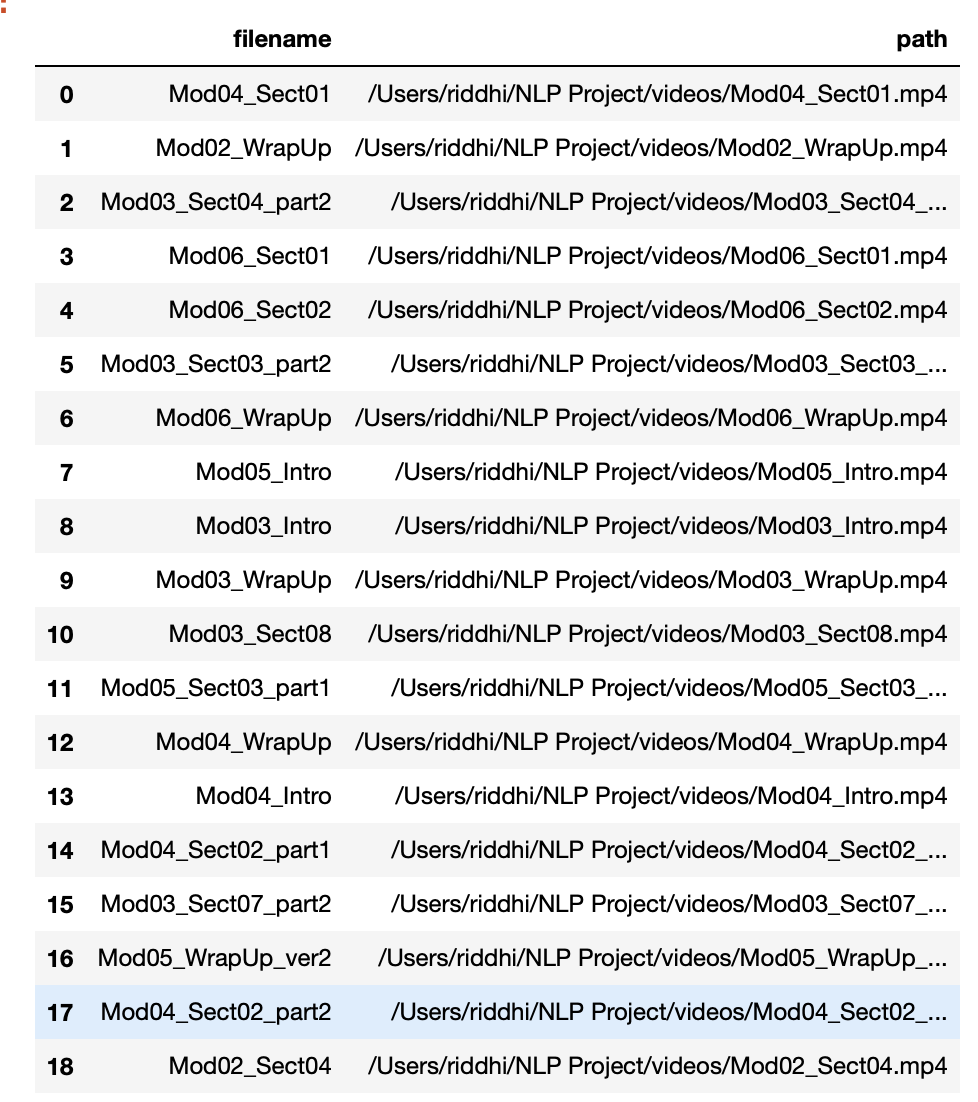

## 6.2 Transcribing the videos

The code in this [section](#2.-Transcribing-the-videos) updates the dataframe with all the transcribed text in the column "transcribed_text".
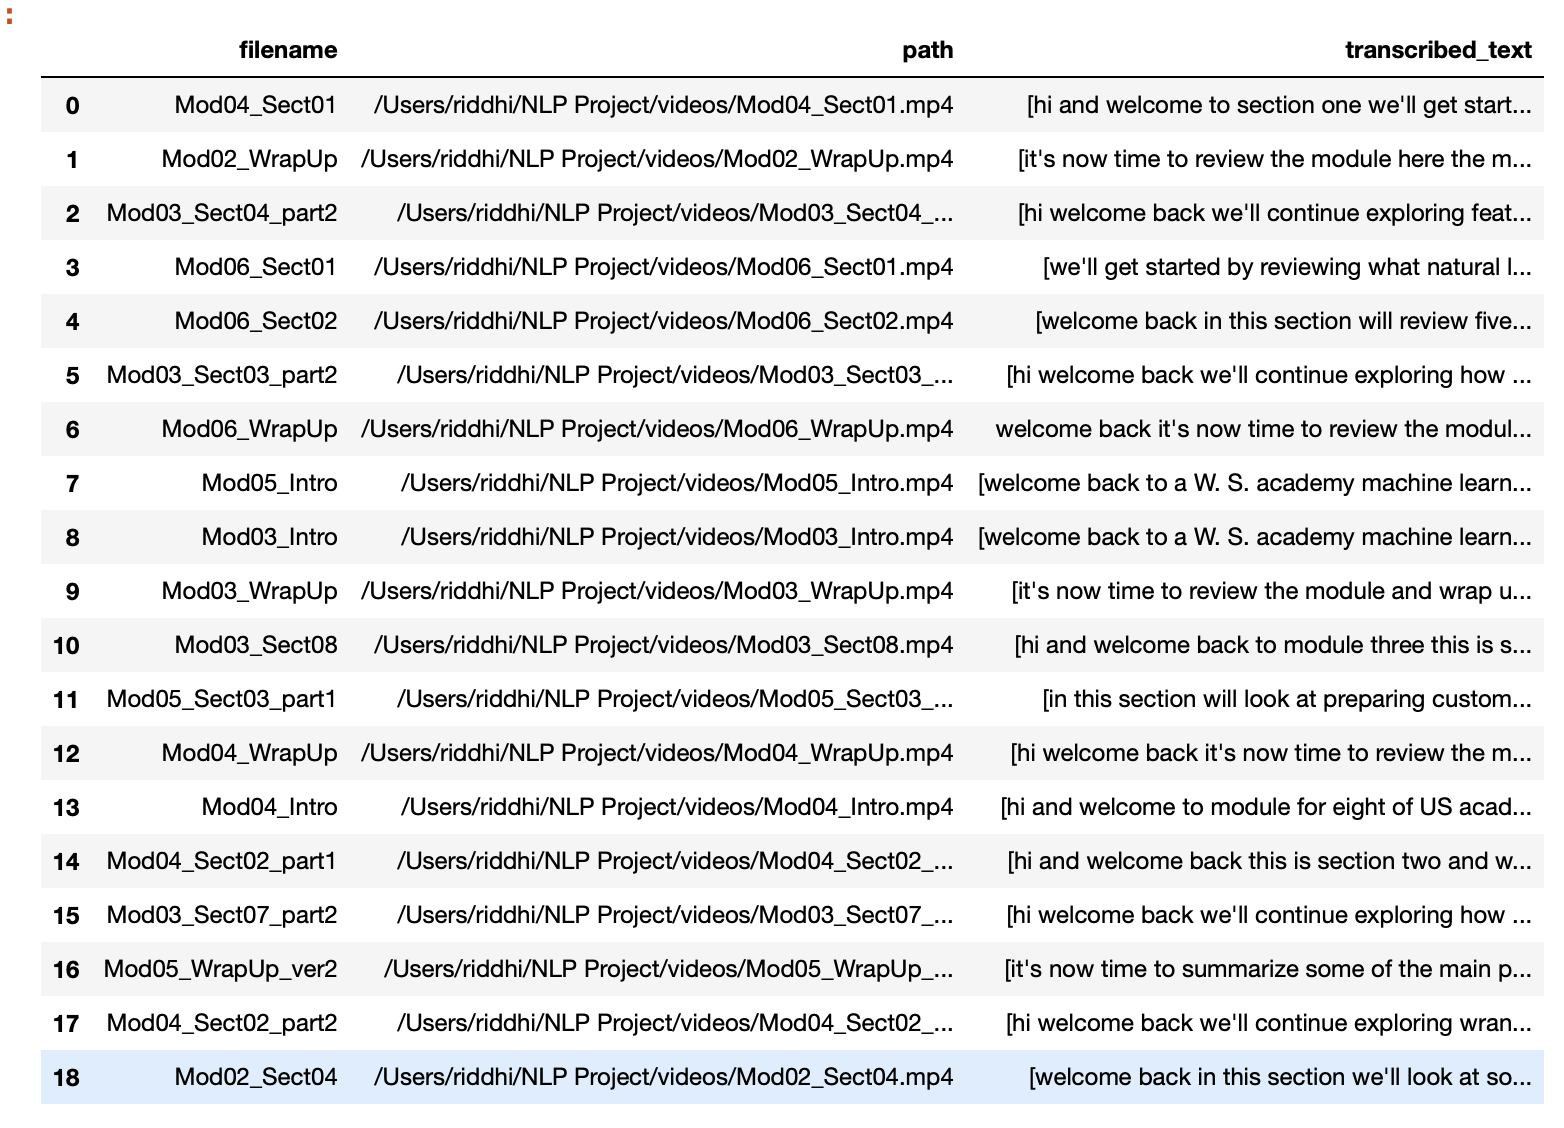

## 6.3 Normalizing the text

The code in this [section](#3.-Normalizing-the-text) updates the dataframe with all the normalized text in the column "normalized_text".
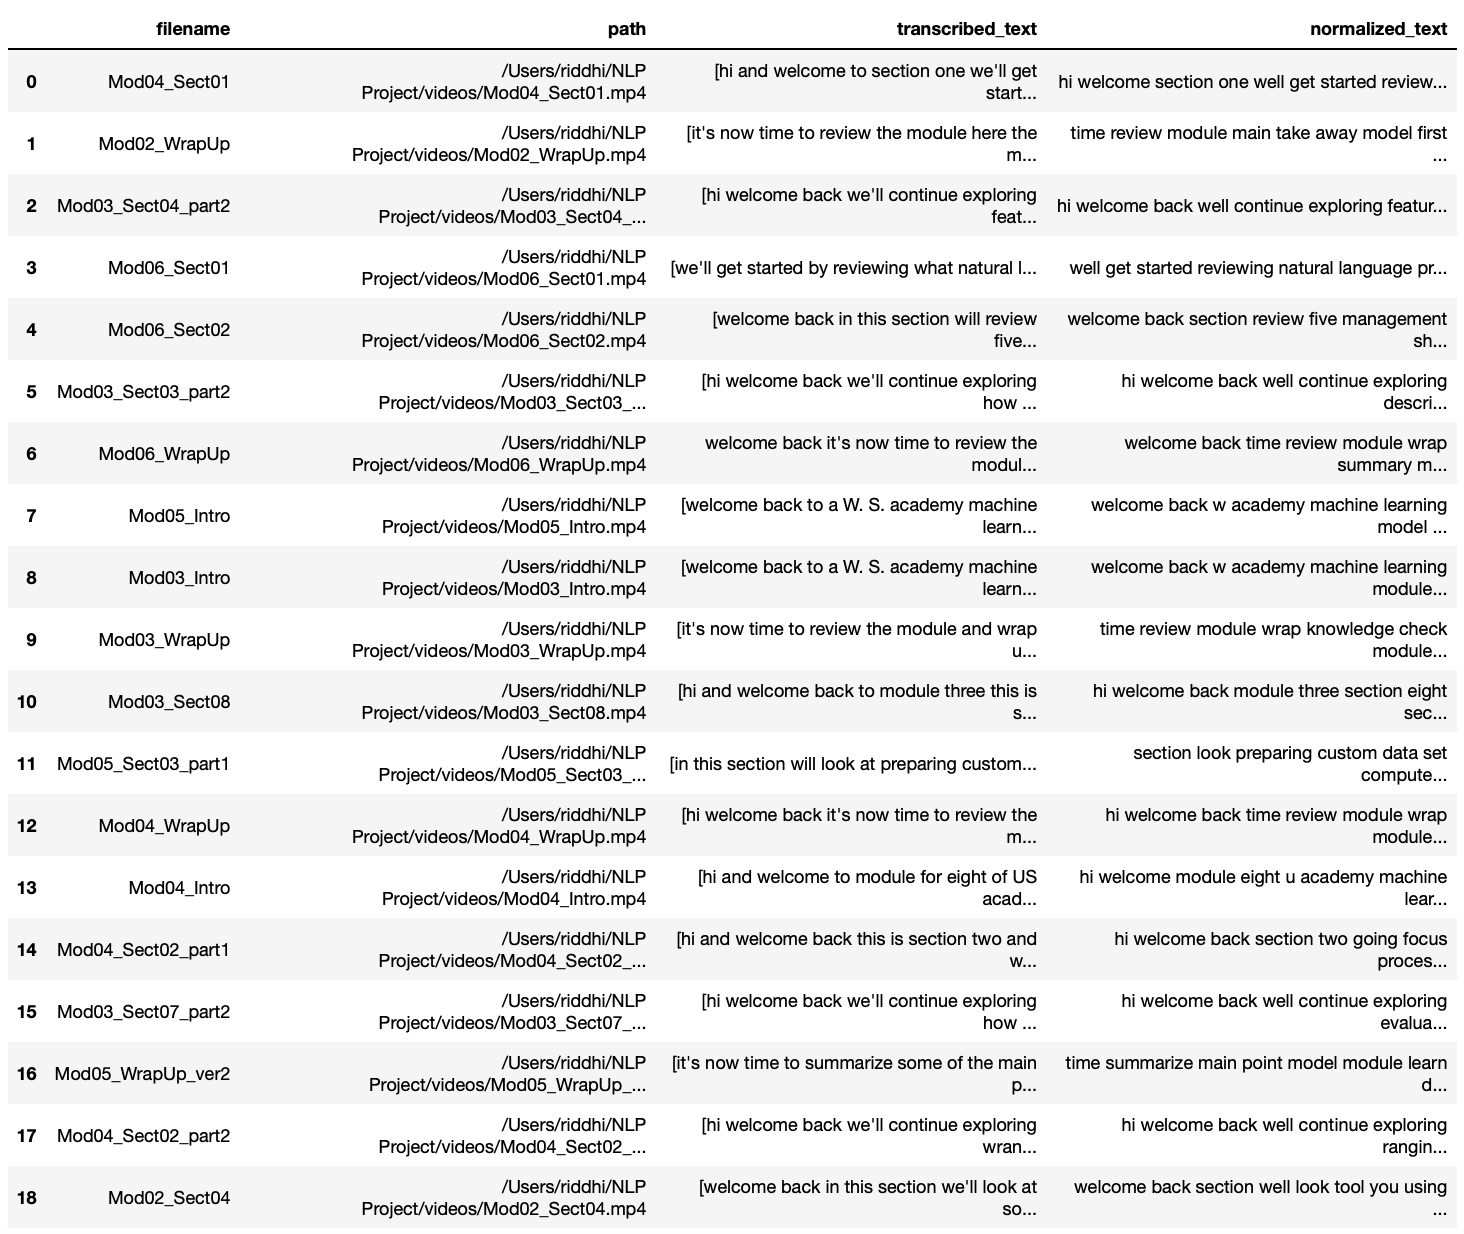

## 6.4 Extracting the Key Phrases and Topics

The code in this [section](#4.-Extracting-key-phrases-and-topics) updates the dataframe with all the Key phrases and topics of the video in the column "Key_Phrases" and "Topic" respectively.
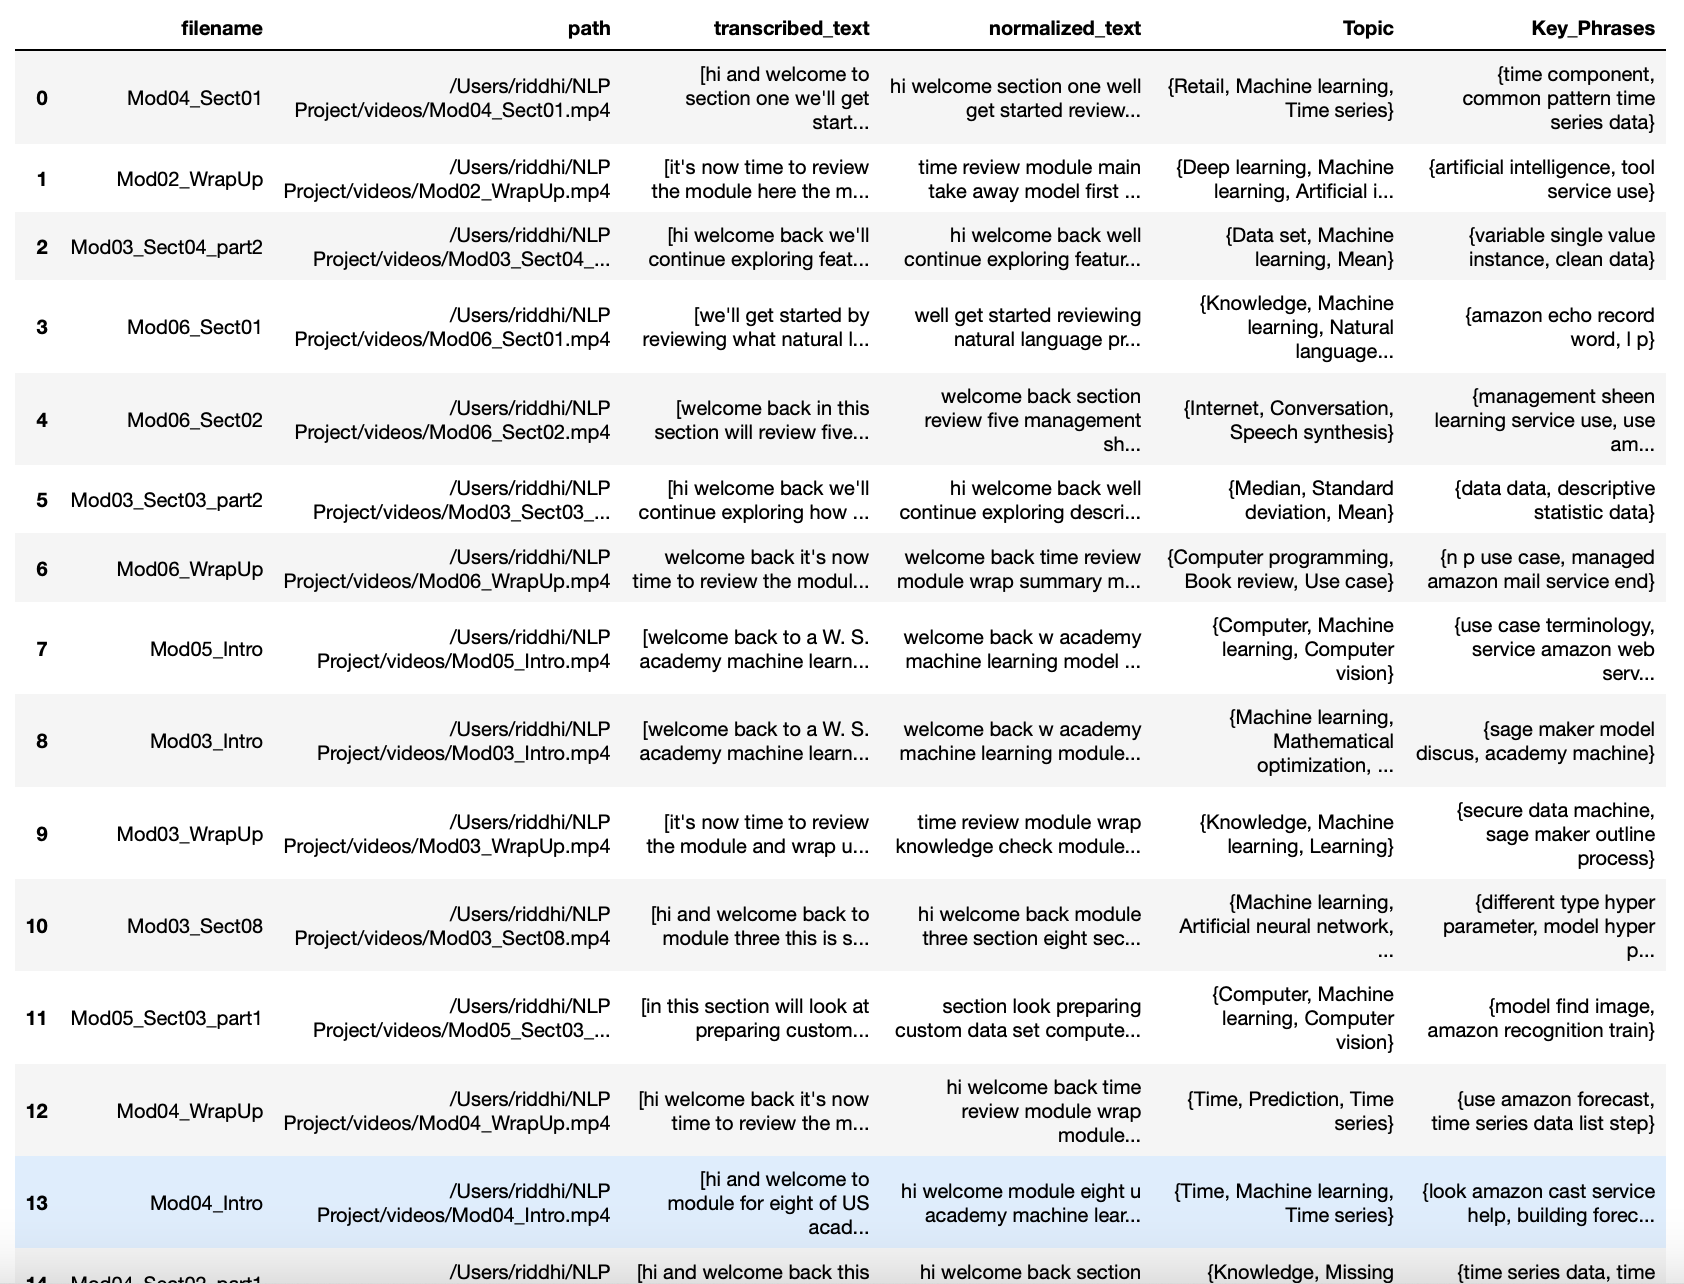

## 6.5 Creating a Dashboard

The code in this [section](#5.-Creating-the-dashboard)
1. Asks the user to enter the Topic that you want a video.
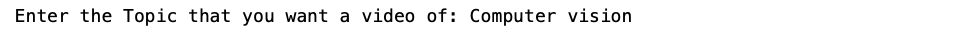


2. Prints all the video file names that are related to the topic that the user asked.
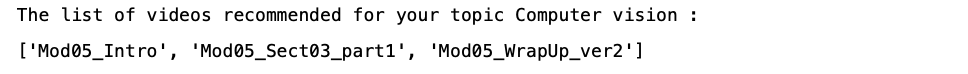

3. Asks the user whether they want to view any video.
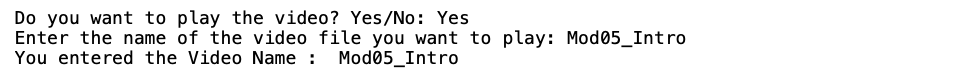

4. If Yes, then ask for the video file name that they want to view
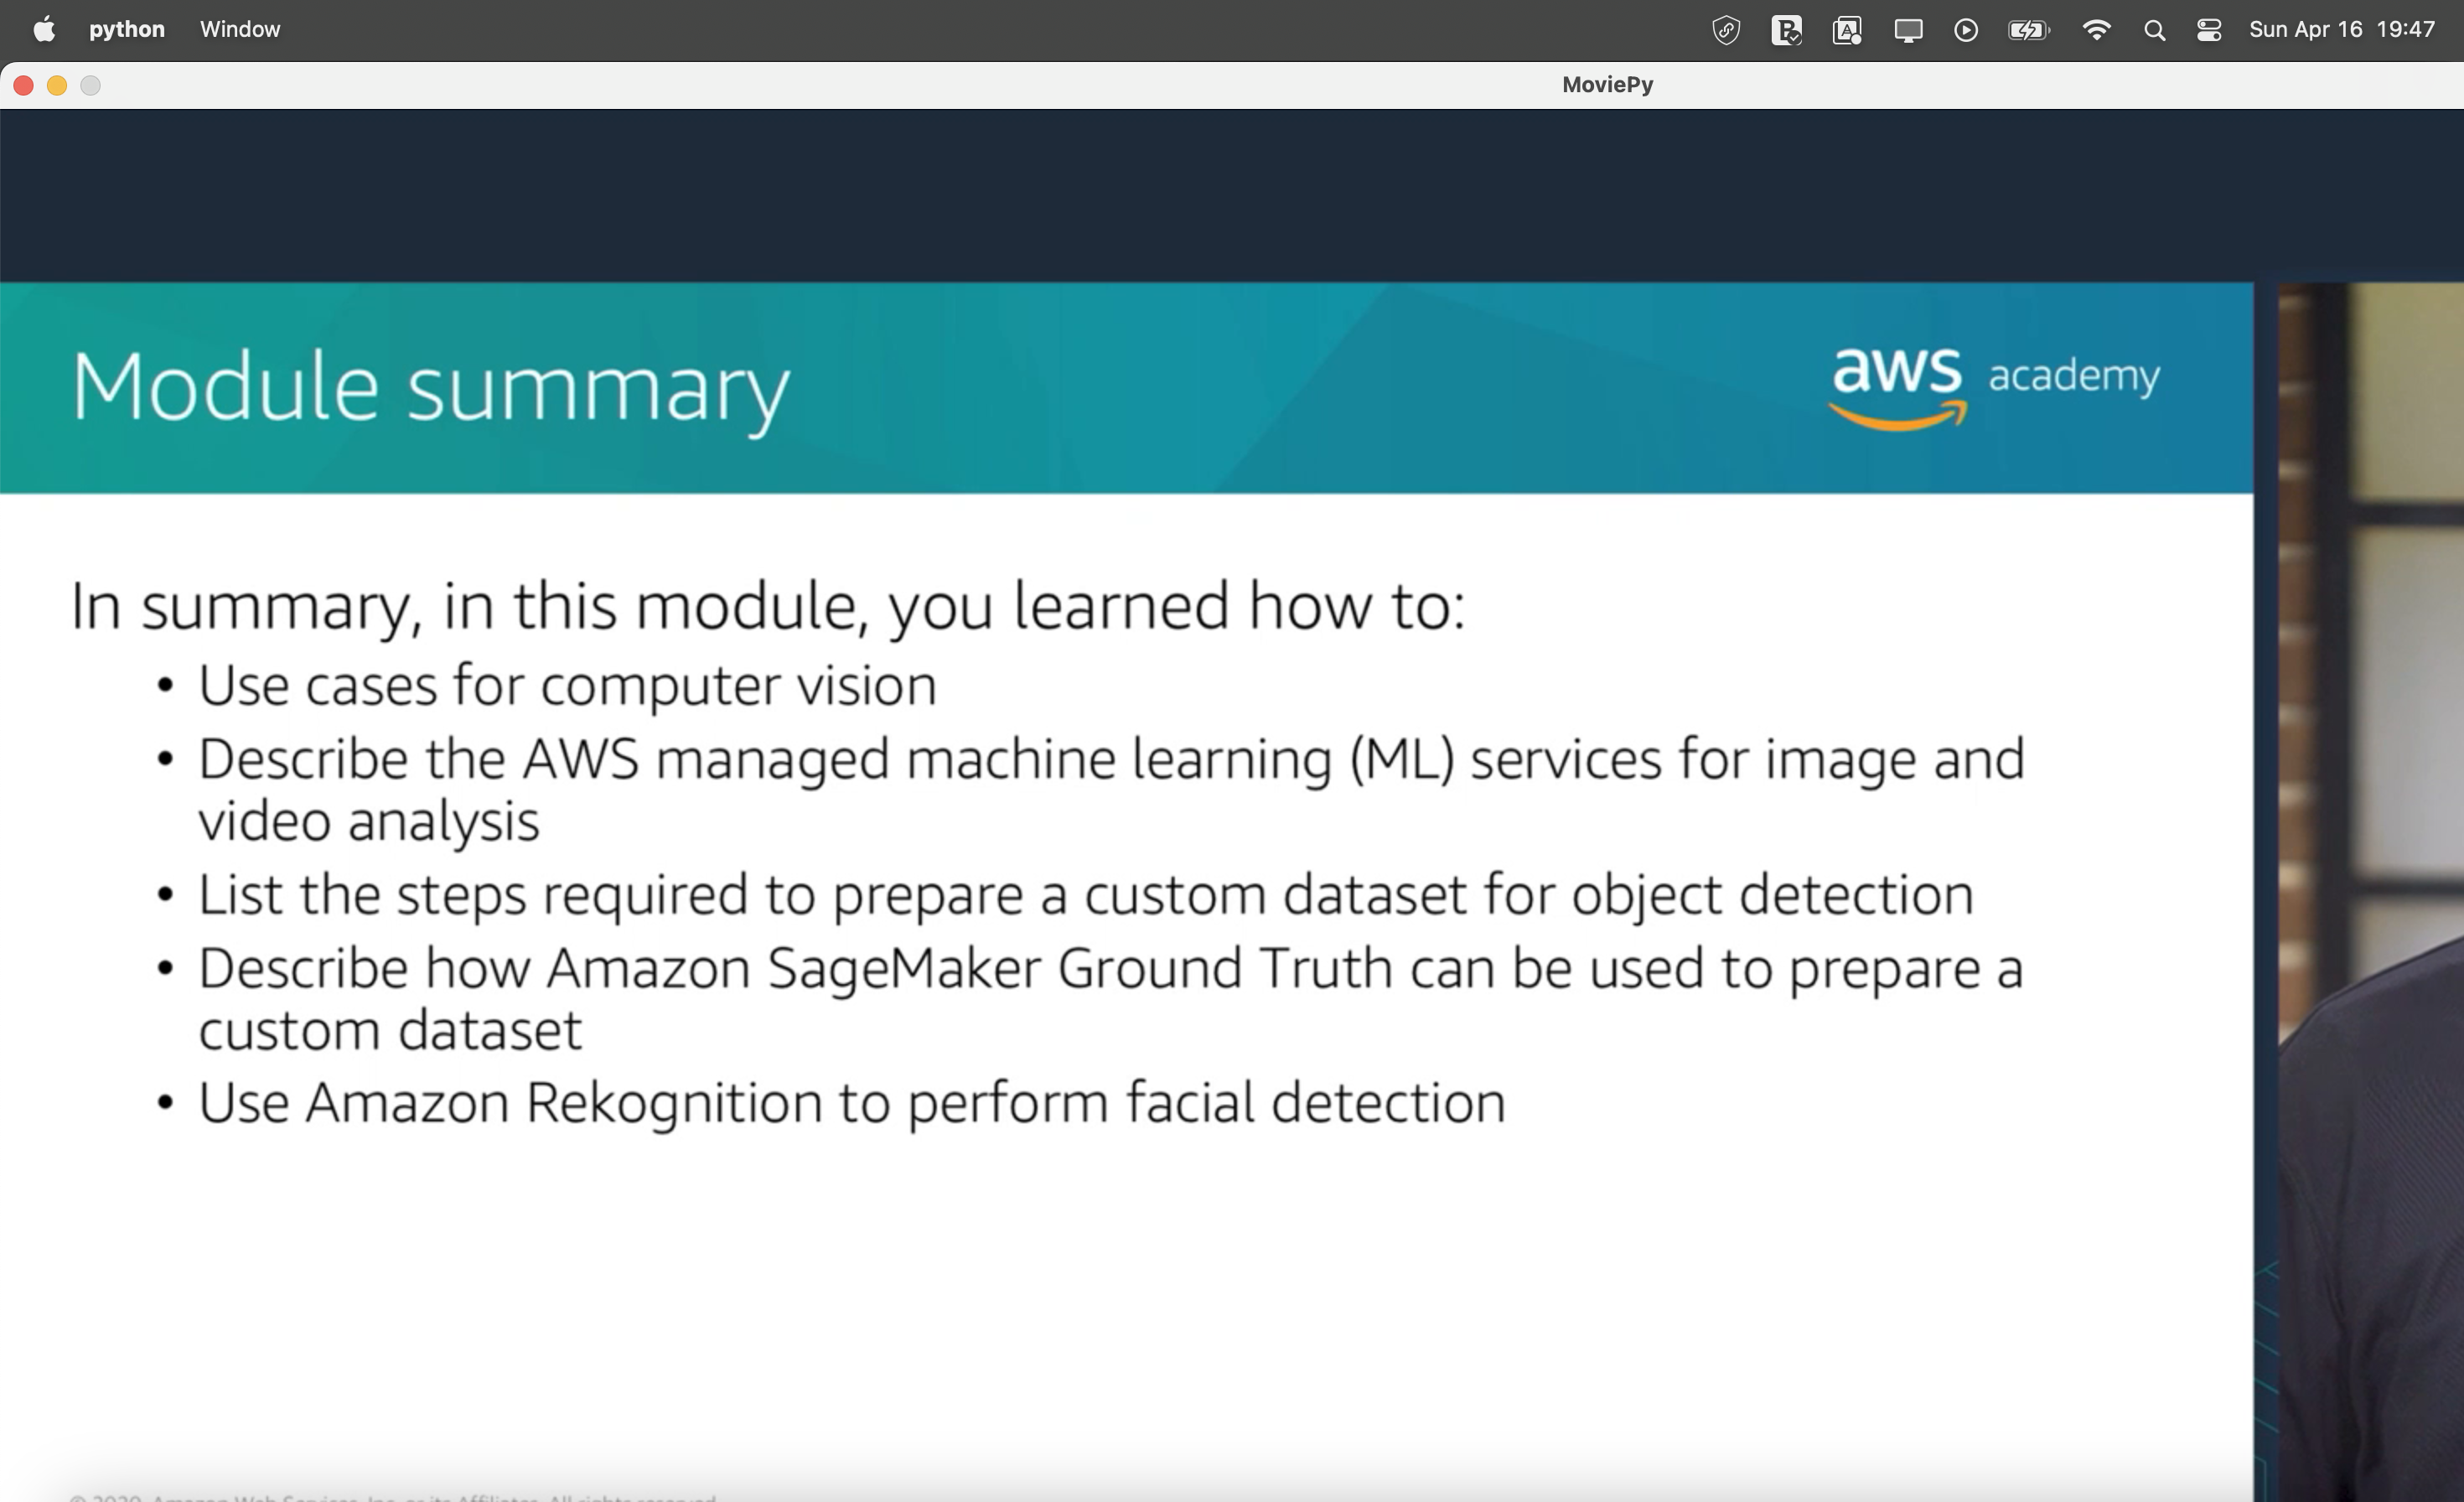


5. Ask whether the user wants to view another video 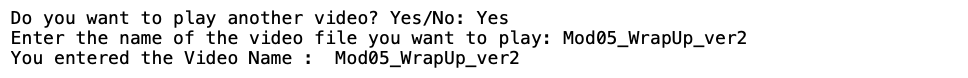

6. If Yes, then play the video
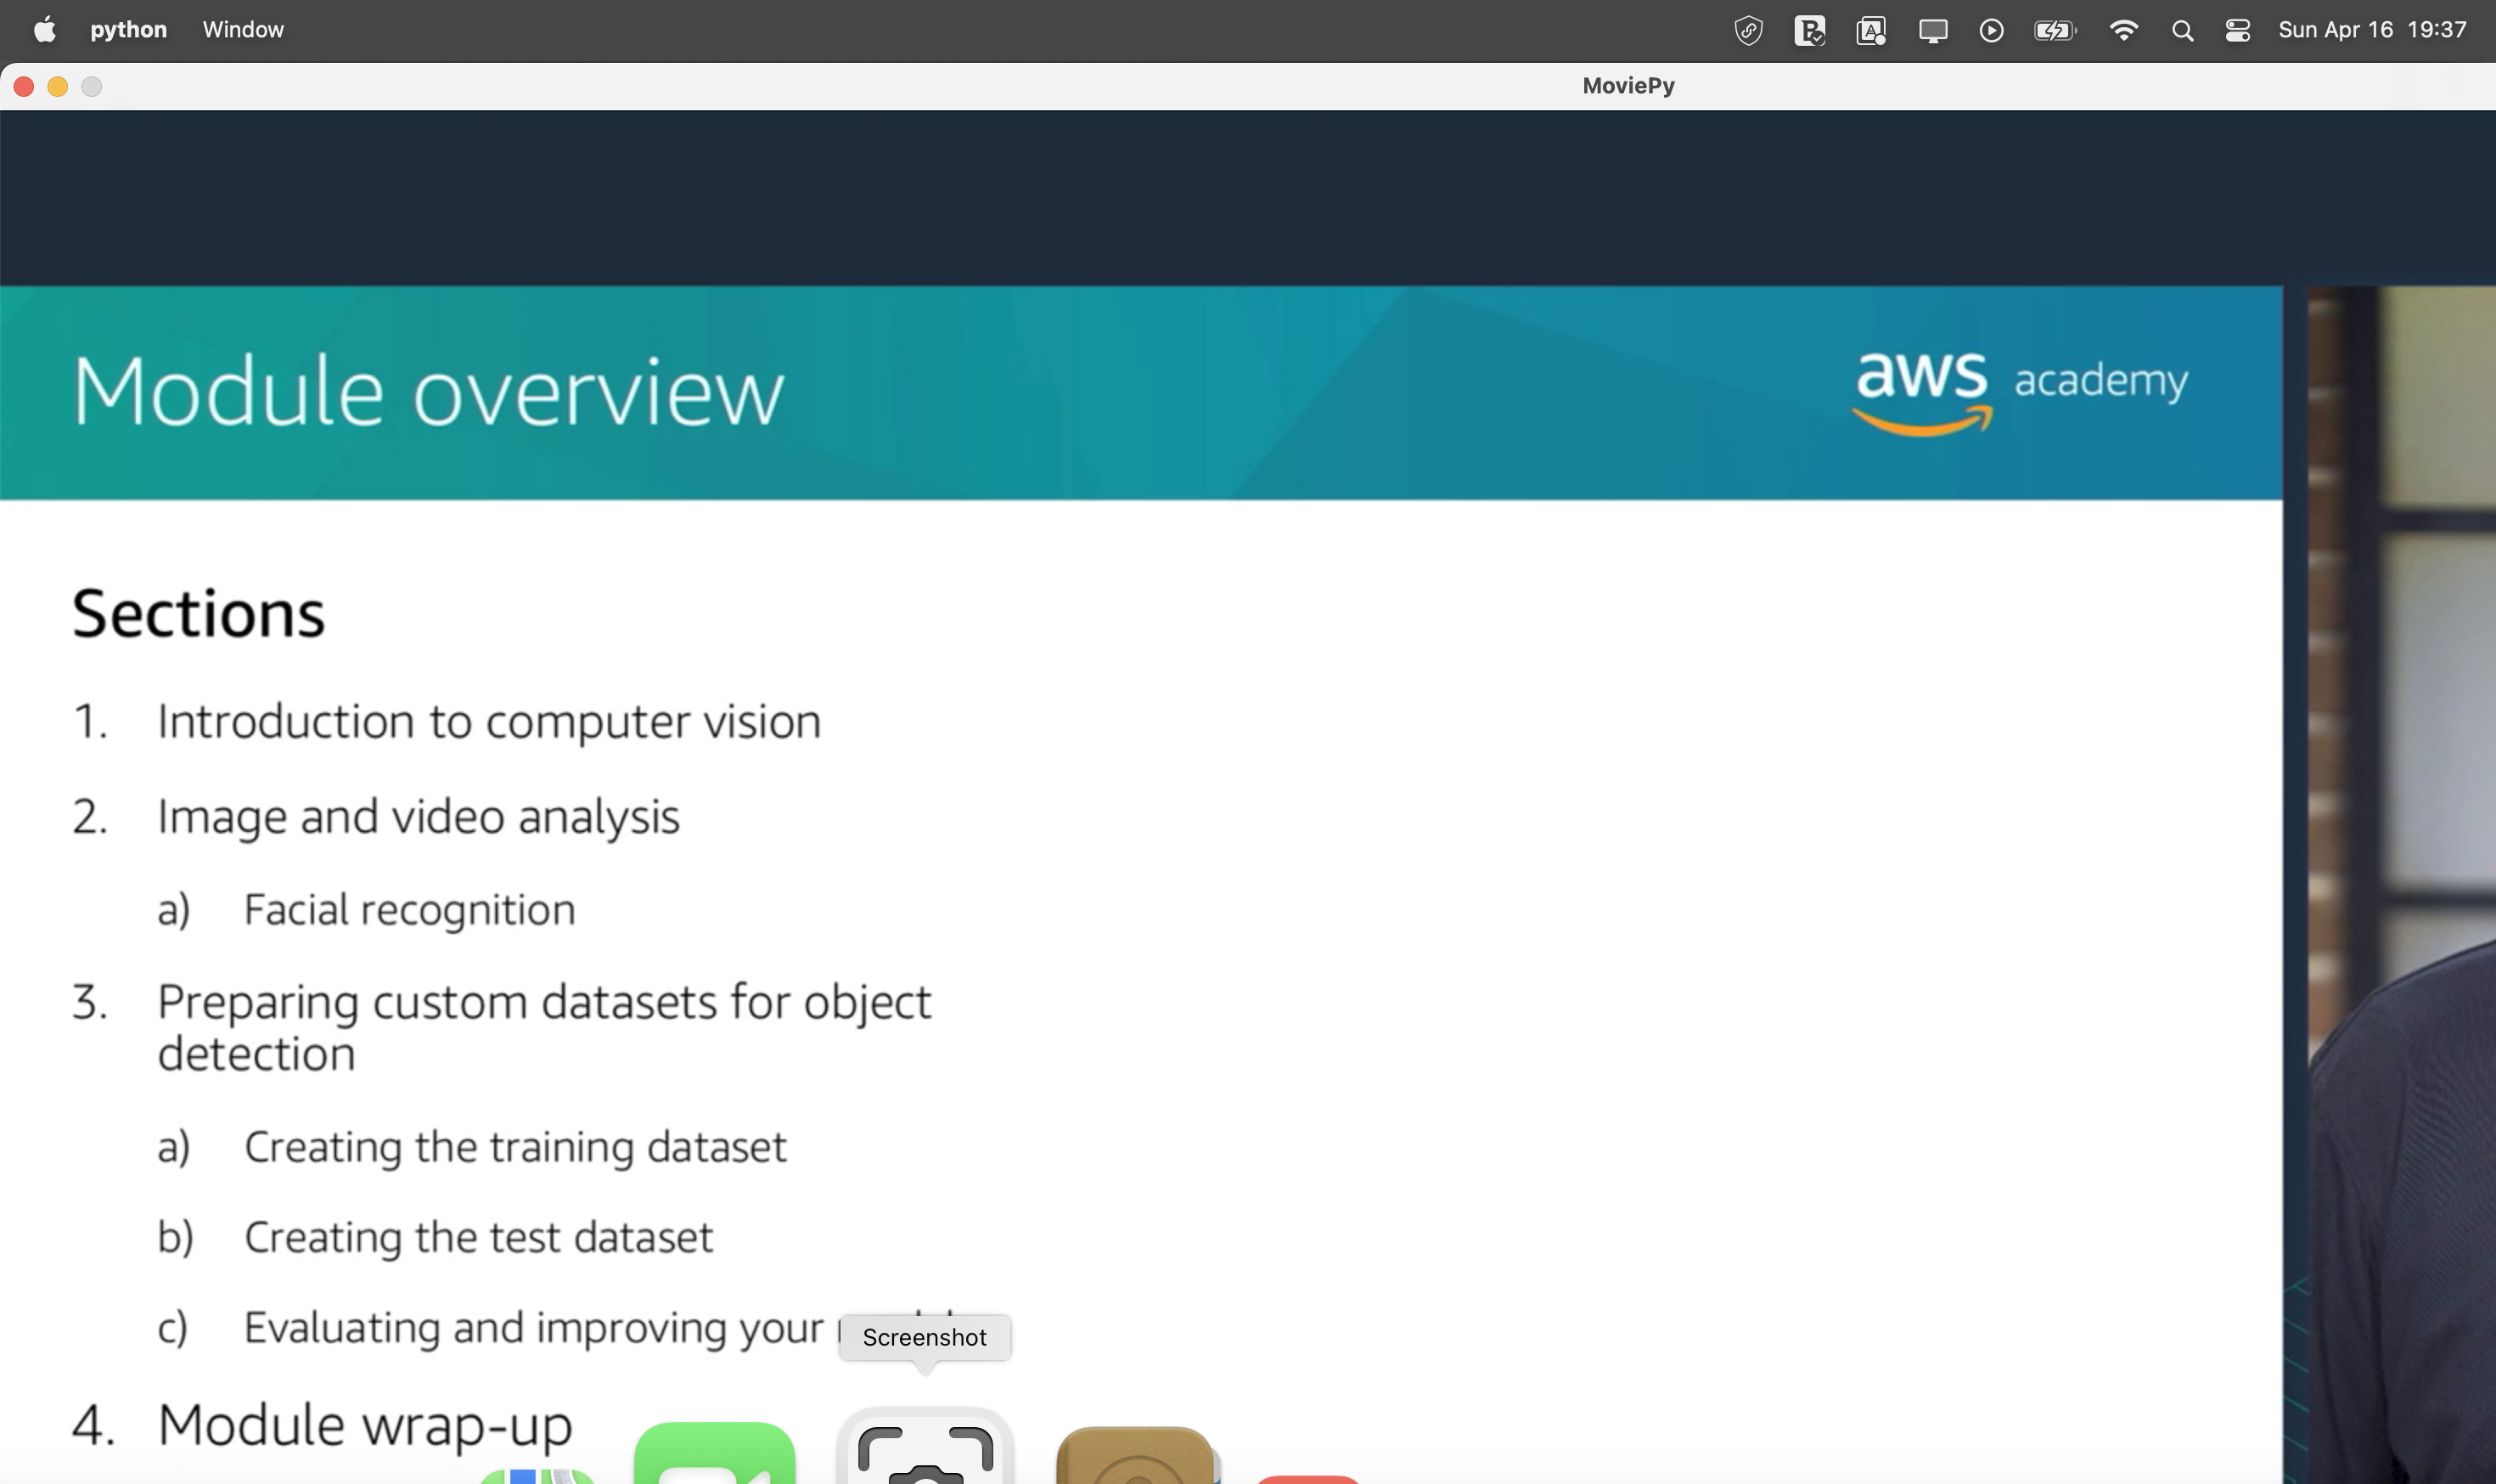

7. If No, then exit
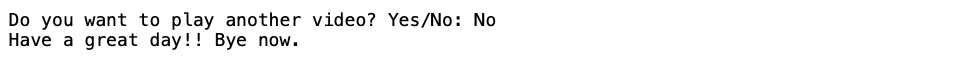